In [3]:
import pandas as pd

ua_full_path = '{}/{}'.format(base_path,'3_HistogramModelTypes/part-00000-4d54dff9-636a-4c26-9d9e-96a17e0a4af2-c000.csv')
a_full_path = '{}/{}'.format(base_path,'AcceptedCases/3_HistogramModelTypes/part-00000-147b0a18-9dc4-4fcf-b226-5c8212377b94-c000.csv')



In [8]:
ua_model_df= pd.read_csv(ua_full_path)
ua_model_df.head()

,model,os_version
0,SO-01L,9
1,SO-01L,9
2,SH-03K,9
3,SO-04K,9
4,SO-03K,9


In [10]:
a_model_df =pd.read_csv(a_full_path)
a_model_df.head()

,model,os_version
0,SC-02L,8.1.0
1,SH-01L,8.1.0
2,SH-01L,8.1.0
3,SH-03K,9
4,SC-02L,8.1.0


In [16]:
ua_model_count_df = ua_model_df.groupby(['model'])\
                                .size()\
                                .sort_values(ascending=False)\
                                .reset_index(name='ua_model_count')

#model_count_df['model_os_version'] = model_count_df[['model','os_version']].apply(lambda x: '_'.join(x), axis=1) 
ua_model_count_df.head()

,model,ua_model_count
0,SO-01L,1373271
1,SH-03K,1086186
2,SO-01K,638738
3,SH-01L,630671
4,SC-01L,394380


In [17]:
a_model_count_df = a_model_df.groupby(['model'])\
                                .size()\
                                .sort_values(ascending=False)\
                                .reset_index(name='a_model_count')

#model_count_df['model_os_version'] = model_count_df[['model','os_version']].apply(lambda x: '_'.join(x), axis=1) 
a_model_count_df.head()

,model,a_model_count
0,SH-01L,1409
1,SO-01L,1085
2,SH-03K,1016
3,SO-01K,794
4,SC-02L,660


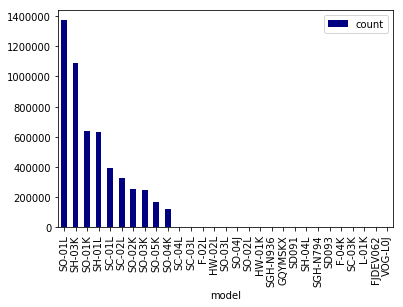

In [14]:
from matplotlib import pyplot as plt

ax = plt.gca()
ua_model_count_df[['model','count']].plot(kind='bar',x='model',y='count',color='navy',ax=ax)
plt.rcParams["figure.figsize"] = (15,8)
plt.show()

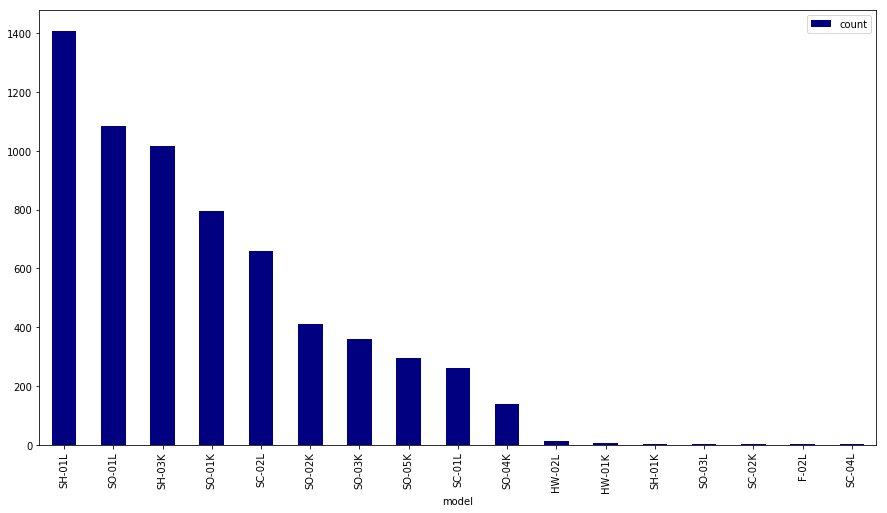

In [15]:
from matplotlib import pyplot as plt

ax = plt.gca()
a_model_count_df[['model','count']].plot(kind='bar',x='model',y='count',color='navy',ax=ax)
plt.rcParams["figure.figsize"] = (15,8)
plt.show()

In [19]:
result_df = pd.merge(ua_model_count_df, a_model_count_df, on='model', how='inner')
result_df.head(35)


,model,ua_model_count,a_model_count
0,SO-01L,1373271,1085
1,SH-03K,1086186,1016
2,SO-01K,638738,794
3,SH-01L,630671,1409
4,SC-01L,394380,262
5,SC-02L,327575,660
6,SO-02K,250218,412
7,SO-03K,247188,361
8,SO-05K,166719,296
9,SO-04K,119914,138


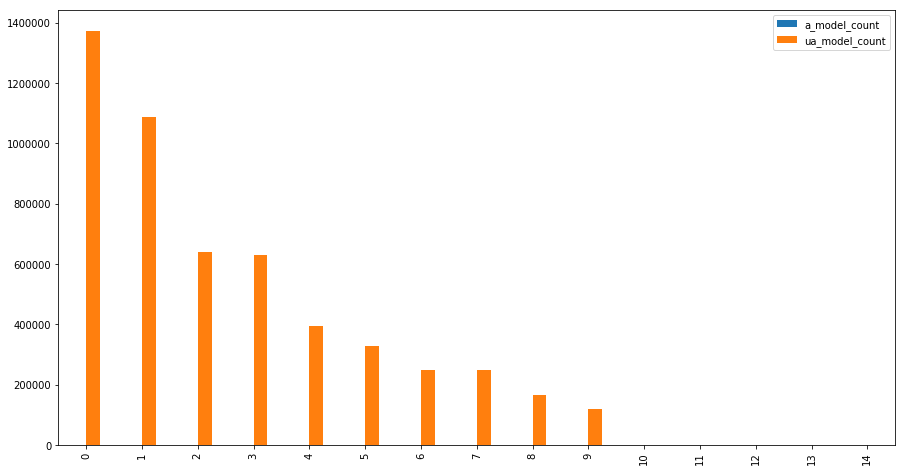

In [22]:
import matplotlib.pyplot as plt
result_df[['model','a_model_count','ua_model_count']].plot(kind='bar')
plt.show()

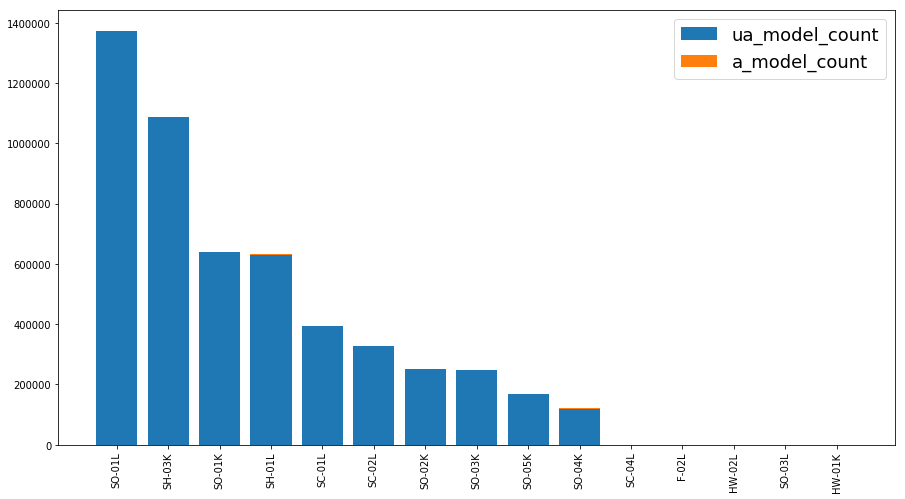

In [24]:
# If it's not already a datetime
cumval=0
fig = plt.figure(figsize=(15,8))
for col in result_df.columns[~result_df.columns.isin(['model'])]:
    plt.bar(result_df.model, result_df[col], bottom=cumval, label=col)
    cumval = cumval+result_df[col]

_ = plt.xticks(rotation=90)
_ = plt.legend(fontsize=18)